# **Linear Regression Analysis**

**Name:** John Rome A. Belocora              
**Date:**04/24/2024  
**Section:** CPE22S3                         
**Teacher:** Engr. Roman Richard

In [123]:
!pip install hvplot

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [262]:
LED = pd.read_csv('Life Expectancy Data.csv')

In [263]:
LED.head()

Country  Year      Status  ...   thinness 5-9 years  Income composition of resources  Schooling
0  Afghanistan  2015  Developing  ...                 17.3                            0.479       10.1
1  Afghanistan  2014  Developing  ...                 17.5                            0.476       10.0
2  Afghanistan  2013  Developing  ...                 17.7                            0.470        9.9
3  Afghanistan  2012  Developing  ...                 18.0                            0.463        9.8
4  Afghanistan  2011  Developing  ...                 18.2                            0.454        9.5

[5 rows x 22 columns]

# **Data Wrangling**

**As we can see here, We are trying to view the values of 'Life expectancy' but it keeps showing an error and I think it is because of the naming of the variables**

In [245]:
LED['Life expectancy']

KeyError: 'Life expectancy'

# **Renaming Columns with Spaces into Underscore**
**I noticed that some of the variables have a excessive spacing, so now we can rename columns with spacing by replacing the spaces with underscores "_" making it more noticable if the variable has an excessive spacing**

In [246]:
def rename_columns_with_spaces(LED):
    renamed_columns = {}
    for col in LED.columns:
        if ' ' in col:
            #Replace spaces with underscores
            new_col_name = col.replace(' ', '_')
            renamed_columns[col] = new_col_name
    #Rename columns in the DataFrame in place
    LED.rename(columns=renamed_columns, inplace=True)
    return LED

print("Before renaming:")
print(LED)

LED = rename_columns_with_spaces(LED)

print("\nAfter renaming:")
print(LED)

Before renaming:
          Country  Year  ... Income composition of resources  Schooling
0     Afghanistan  2015  ...                           0.479       10.1
1     Afghanistan  2014  ...                           0.476       10.0
2     Afghanistan  2013  ...                           0.470        9.9
3     Afghanistan  2012  ...                           0.463        9.8
4     Afghanistan  2011  ...                           0.454        9.5
...           ...   ...  ...                             ...        ...
2933     Zimbabwe  2004  ...                           0.407        9.2
2934     Zimbabwe  2003  ...                           0.418        9.5
2935     Zimbabwe  2002  ...                           0.427       10.0
2936     Zimbabwe  2001  ...                           0.427        9.8
2937     Zimbabwe  2000  ...                           0.434        9.8

[2938 rows x 22 columns]

After renaming:
          Country  Year  ... Income_composition_of_resources  Schooling
0   

**Now we have Identified that there really is a excessive spacing in the variables. for example the variable 'Life expectancy' turned into 'Life_expectancy_' which means that there really is a excessive spacing in some variables**

In [247]:
#New output
LED.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy_', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles_', '_BMI_', 'under-five_deaths_', 'Polio', 'Total_expenditure',
       'Diphtheria_', '_HIV/AIDS', 'GDP', 'Population',
       '_thinness__1-19_years', '_thinness_5-9_years',
       'Income_composition_of_resources', 'Schooling'],
      dtype='object')

# **Removing Excess Underscore**
**By just modifying the function, we can use the 'strip' method to remove excess underscores in the variable and a 'if' method which identifies if there are underscores in the beggining of the variable which resolves the issue**

In [264]:
def excess_underscore(LED):
    renamed_columns = {}
    for col in LED.columns:
        if ' ' in col:
            new_col_name = col.replace(' ', '_')
            # Remove leading or trailing underscore if present next to a space
            new_col_name = new_col_name.strip('_')
            # If the column starts with an underscore, remove it
            if new_col_name.startswith('_'):
                new_col_name = new_col_name[1:]
            renamed_columns[col] = new_col_name
    LED.rename(columns=renamed_columns, inplace=True)
    return LED

print("Before renaming:")
print(LED)

LED = excess_underscore(LED)

print("\nAfter renaming:")
print(LED)

Before renaming:
          Country  Year  ... Income composition of resources  Schooling
0     Afghanistan  2015  ...                           0.479       10.1
1     Afghanistan  2014  ...                           0.476       10.0
2     Afghanistan  2013  ...                           0.470        9.9
3     Afghanistan  2012  ...                           0.463        9.8
4     Afghanistan  2011  ...                           0.454        9.5
...           ...   ...  ...                             ...        ...
2933     Zimbabwe  2004  ...                           0.407        9.2
2934     Zimbabwe  2003  ...                           0.418        9.5
2935     Zimbabwe  2002  ...                           0.427       10.0
2936     Zimbabwe  2001  ...                           0.427        9.8
2937     Zimbabwe  2000  ...                           0.434        9.8

[2938 rows x 22 columns]

After renaming:
          Country  Year      Status  ...  thinness_5-9_years  Income_composi

In [265]:
#New Output
LED

Country  Year      Status  ...  thinness_5-9_years  Income_composition_of_resources  Schooling
0     Afghanistan  2015  Developing  ...                17.3                            0.479       10.1
1     Afghanistan  2014  Developing  ...                17.5                            0.476       10.0
2     Afghanistan  2013  Developing  ...                17.7                            0.470        9.9
3     Afghanistan  2012  Developing  ...                18.0                            0.463        9.8
4     Afghanistan  2011  Developing  ...                18.2                            0.454        9.5
...           ...   ...         ...  ...                 ...                              ...        ...
2933     Zimbabwe  2004  Developing  ...                 9.4                            0.407        9.2
2934     Zimbabwe  2003  Developing  ...                 9.9                            0.418        9.5
2935     Zimbabwe  2002  Developing  ...                 1.3                            0.427       10.0
2936     Zimbabwe  2001  Developing  ...                 1.7                            0.427        9.8
2937     Zimbabwe  2000  Developing  ...                11.2                            0.434        9.8

[2938 rows x 22 columns]

# **Identifying Missing Values**

In [266]:
#Creating a function that can Identify missing values in each column
def missing_values(LED):
    #Count missing values in each column
    missing_values = LED.isnull().sum()
    return missing_values

missing_values = missing_values(LED)
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                            194
percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
under-five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness__1-19_years                34
thinness_5-9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64


**We can see here the missing values for the variable 'Alcohol'**

In [267]:
LED[LED['Alcohol'].isnull()]

Country  Year  ... Income_composition_of_resources  Schooling
32                               Algeria  2015  ...                           0.743       14.4
48                                Angola  2015  ...                           0.531       11.4
64                   Antigua and Barbuda  2015  ...                           0.784       13.9
80                             Argentina  2015  ...                           0.826       17.3
96                               Armenia  2015  ...                           0.741       12.7
...                                  ...   ...  ...                             ...        ...
2858  Venezuela (Bolivarian Republic of)  2015  ...                           0.769       14.3
2874                            Viet Nam  2015  ...                           0.678       12.6
2890                               Yemen  2015  ...                           0.499        9.0
2906                              Zambia  2015  ...                           0.576       12.5
2922                            Zimbabwe  2015  ...                           0.507       10.3

[194 rows x 22 columns]

**Now we can see here that the Alcohol column of the Country Algeria consist of different values and also a NaN value.**

In [268]:
LED[LED['Country']=='Algeria']

Country  Year      Status  ...  thinness_5-9_years  Income_composition_of_resources  Schooling
32  Algeria  2015  Developing  ...                 5.8                            0.743       14.4
33  Algeria  2014  Developing  ...                 5.8                            0.741       14.4
34  Algeria  2013  Developing  ...                 5.8                            0.737       14.4
35  Algeria  2012  Developing  ...                 5.8                            0.732       14.4
36  Algeria  2011  Developing  ...                 5.8                            0.724       14.0
37  Algeria  2010  Developing  ...                 5.8                            0.714       13.6
38  Algeria  2009  Developing  ...                 5.9                            0.705       13.1
39  Algeria  2008  Developing  ...                 5.9                            0.697       12.6
40  Algeria  2007  Developing  ...                 5.9                            0.690       12.3
41  Algeria  2006  Developing  ...                 6.0                            0.686       12.3
42  Algeria  2005  Developing  ...                 6.0                            0.680       12.0
43  Algeria  2004  Developing  ...                 6.1                            0.673       11.7
44  Algeria  2003  Developing  ...                 6.1                            0.663       11.5
45  Algeria  2002  Developing  ...                 6.2                            0.653       11.1
46  Algeria  2001  Developing  ...                 6.3                            0.644       10.9
47  Algeria  2000  Developing  ...                 6.4                            0.636       10.7

[16 rows x 22 columns]

**To fix this issue, we can get the mean of the Alchohol of the country Algeria and replace the missing value with the mean**

# **Filling missing values with mean depending on each Country**
**We are filling the missing values for all columns except for 'Country' and 'Status' By getting the mean for each column values depending on the country then filling the missing value with the given mean**

In [255]:
#Columns to fill missing values
#Excluding the 'Country' and 'Status' column since they are object dtypes
columns_to_fill = LED.columns.difference(['Country', 'Status'])

#Fill missing values for each column separately based on the country
for col in columns_to_fill:
    LED[col] = LED.groupby('Country')[col].transform(lambda x: x.fillna(x.mean()))

print(LED)

          Country  Year      Status  ...  thinness_5-9_years  Income_composition_of_resources  Schooling
0     Afghanistan  2015  Developing  ...                17.3                            0.479       10.1
1     Afghanistan  2014  Developing  ...                17.5                            0.476       10.0
2     Afghanistan  2013  Developing  ...                17.7                            0.470        9.9
3     Afghanistan  2012  Developing  ...                18.0                            0.463        9.8
4     Afghanistan  2011  Developing  ...                18.2                            0.454        9.5
...           ...   ...         ...  ...                 ...                              ...        ...
2933     Zimbabwe  2004  Developing  ...                 9.4                            0.407        9.2
2934     Zimbabwe  2003  Developing  ...                 9.9                            0.418        9.5
2935     Zimbabwe  2002  Developing  ...               

In [256]:
LED.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                             17
percentage_expenditure               0
Hepatitis_B                        144
Measles                              0
BMI                                 34
under-five_deaths                    0
Polio                                0
Total_expenditure                   32
Diphtheria                           0
HIV/AIDS                             0
GDP                                405
Population                         648
thinness__1-19_years                34
thinness_5-9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

**Some missing values cannot be changed since they have no data collected in their Country. We can see Yemen's GDP and Population as an example below:**

In [234]:
LED[LED['Country'] == 'Yemen']

Country  Year      Status  ...  thinness_5-9_years  Income_composition_of_resources  Schooling
2890   Yemen  2015  Developing  ...                13.4                            0.499        9.0
2891   Yemen  2014  Developing  ...                13.5                            0.500        9.0
2892   Yemen  2013  Developing  ...                13.5                            0.498        9.0
2893   Yemen  2012  Developing  ...                13.6                            0.494        9.0
2894   Yemen  2011  Developing  ...                13.6                            0.493        8.6
2895   Yemen  2010  Developing  ...                13.7                            0.488        8.5
2896   Yemen  2009  Developing  ...                13.7                            0.483        8.4
2897   Yemen  2008  Developing  ...                13.7                            0.480        8.5
2898   Yemen  2007  Developing  ...                13.8                            0.477        8.6
2899   Yemen  2006  Developing  ...                13.8                            0.475        8.7
2900   Yemen  2005  Developing  ...                13.8                            0.470        8.6
2901   Yemen  2004  Developing  ...                13.9                            0.464        8.4
2902   Yemen  2003  Developing  ...                13.9                            0.457        8.2
2903   Yemen  2002  Developing  ...                14.0                            0.450        8.0
2904   Yemen  2001  Developing  ...                14.0                            0.444        7.9
2905   Yemen  2000  Developing  ...                14.1                            0.436        7.7

[16 rows x 22 columns]

# **Exploratory Data Analysis (EDA)**

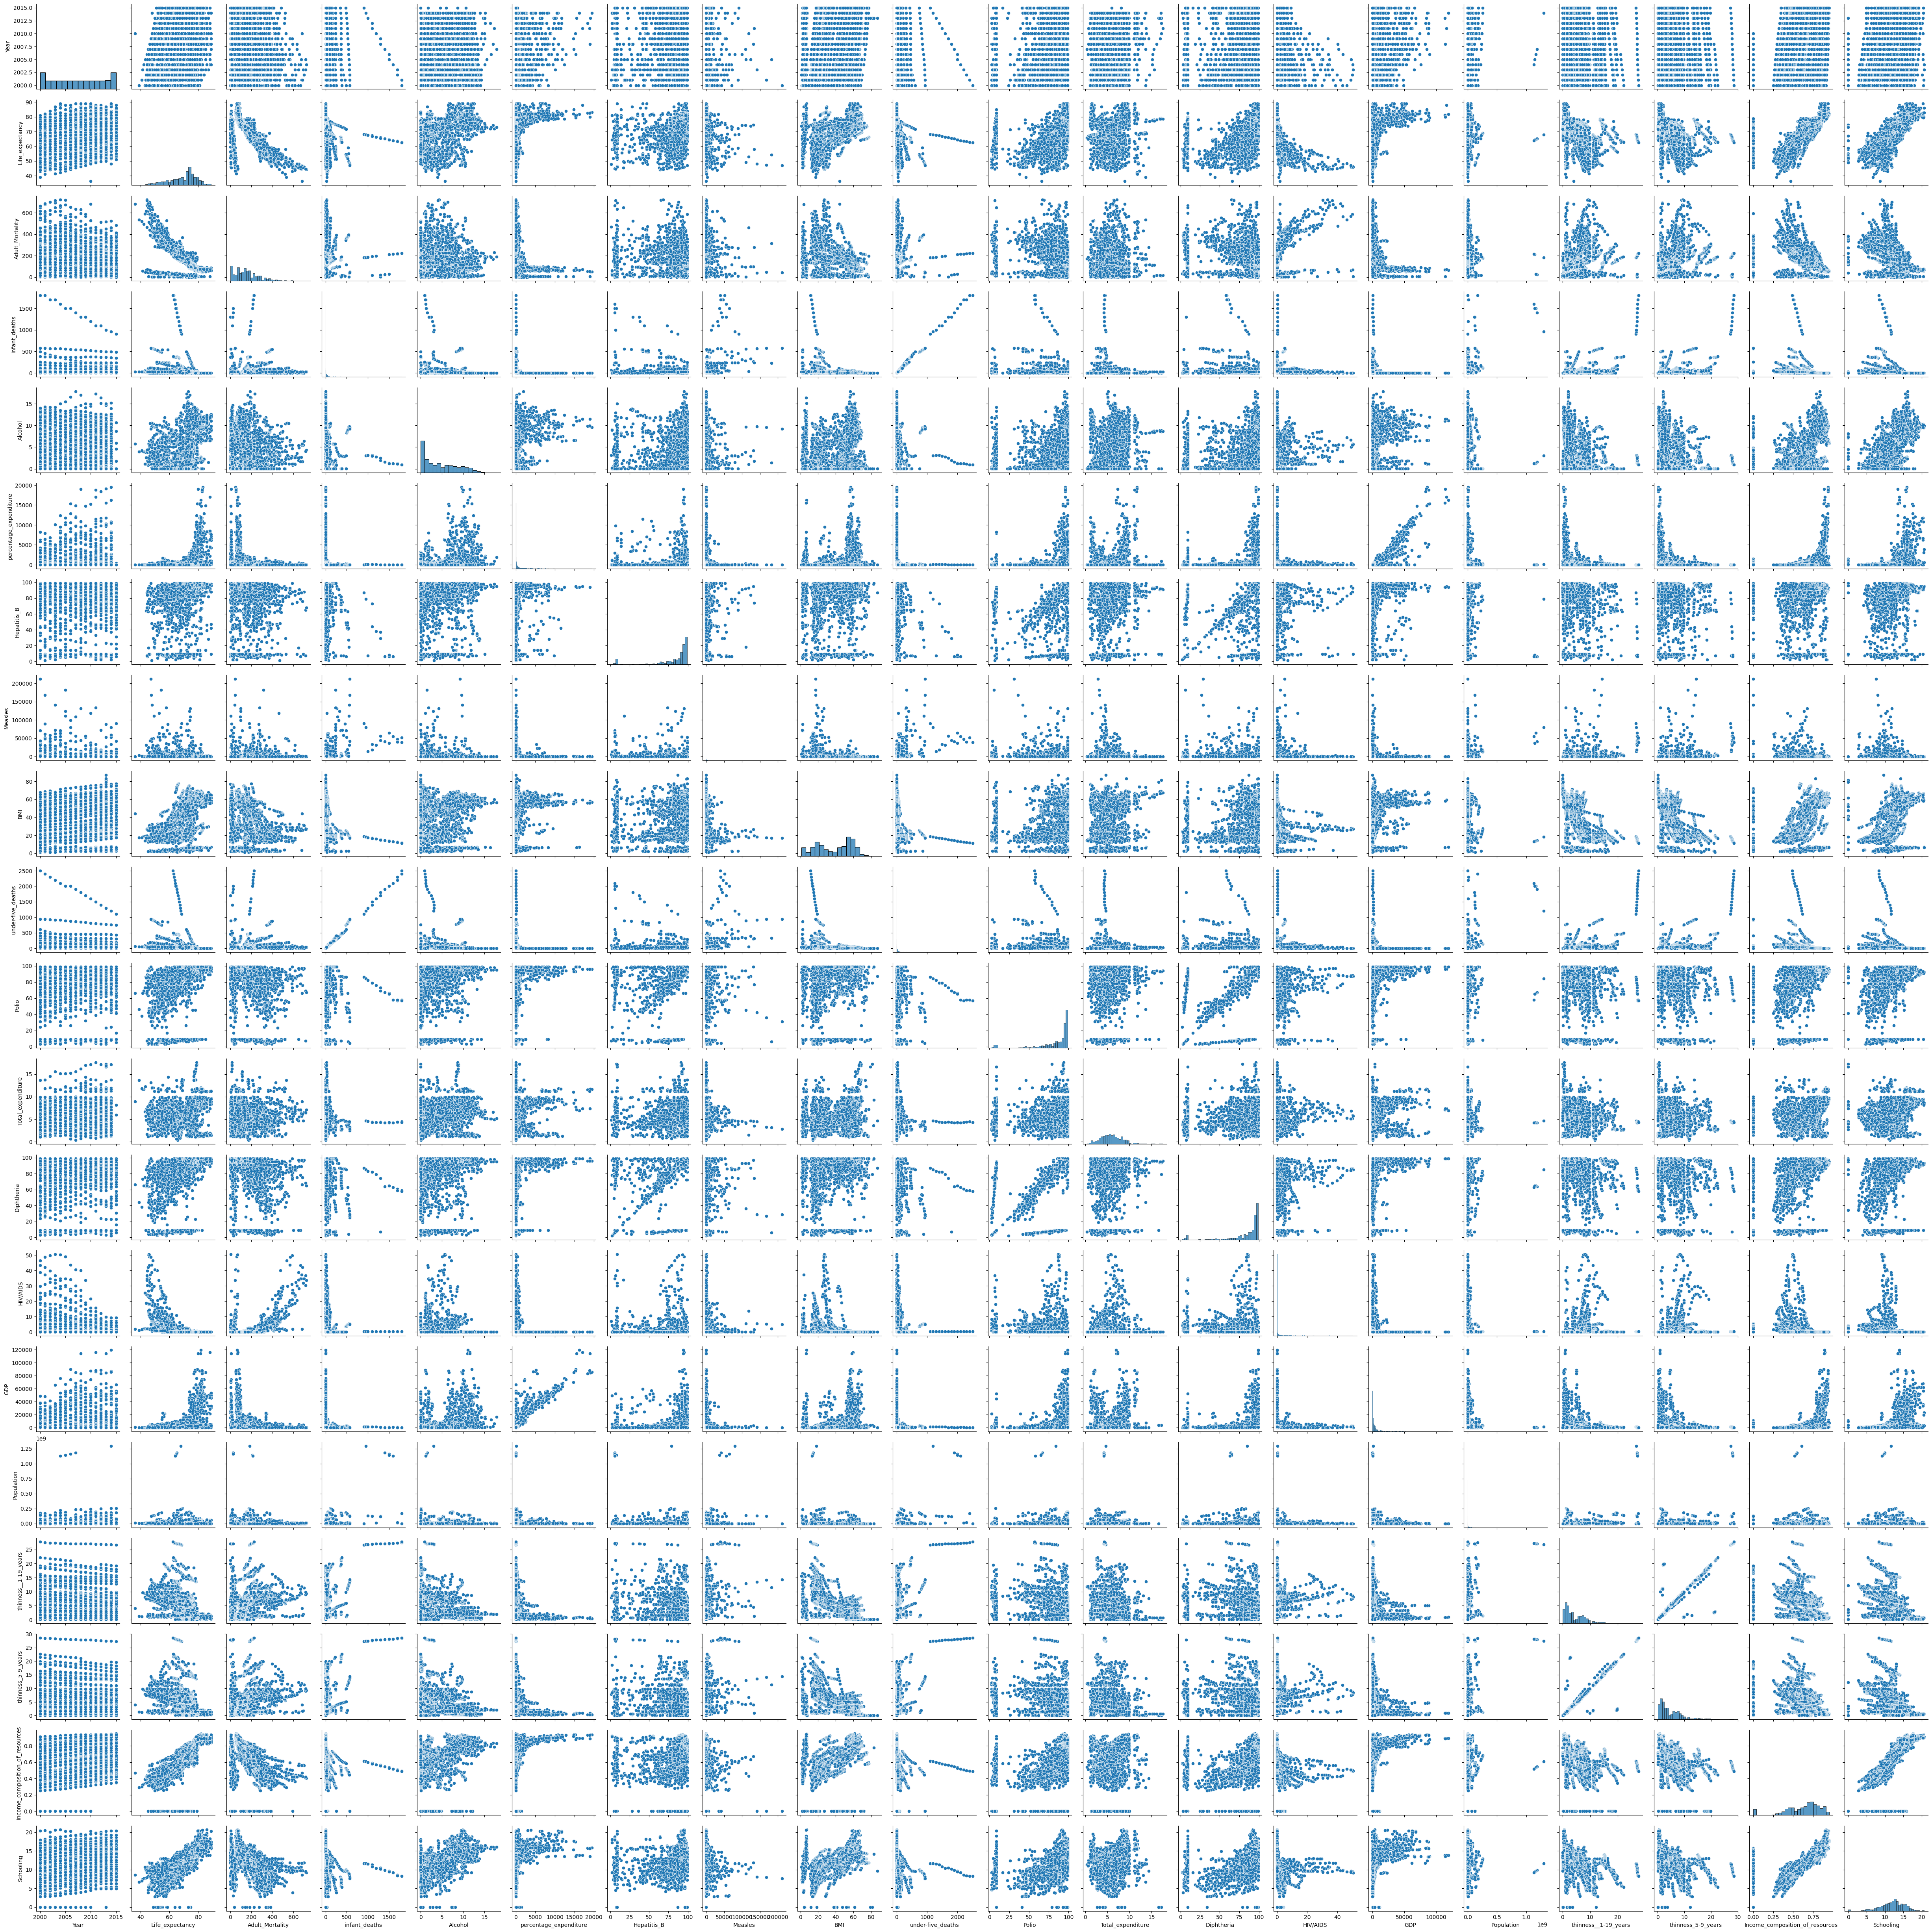

In [269]:
#Pair plot of the Dataframe
sns.pairplot(LED)

In [343]:
# Creating a new dataframe copy with the index of Country Column
df = LED.copy()
df.set_index('Country', inplace=True)
df

Year      Status  ...  Income_composition_of_resources  Schooling
Country                        ...                                            
Afghanistan  2015  Developing  ...                            0.479       10.1
Afghanistan  2014  Developing  ...                            0.476       10.0
Afghanistan  2013  Developing  ...                            0.470        9.9
Afghanistan  2012  Developing  ...                            0.463        9.8
Afghanistan  2011  Developing  ...                            0.454        9.5
...           ...         ...  ...                              ...        ...
Zimbabwe     2004  Developing  ...                            0.407        9.2
Zimbabwe     2003  Developing  ...                            0.418        9.5
Zimbabwe     2002  Developing  ...                            0.427       10.0
Zimbabwe     2001  Developing  ...                            0.427        9.8
Zimbabwe     2000  Developing  ...                            0.434        9.8

[2938 rows x 21 columns]

In [277]:
#Dropping Status column since it is a object datatype
df.drop('Status', axis=1, inplace=True)
df

Year  Life_expectancy  ...  Income_composition_of_resources  Schooling
Country                             ...                                            
Afghanistan  2015             65.0  ...                            0.479       10.1
Afghanistan  2014             59.9  ...                            0.476       10.0
Afghanistan  2013             59.9  ...                            0.470        9.9
Afghanistan  2012             59.5  ...                            0.463        9.8
Afghanistan  2011             59.2  ...                            0.454        9.5
...           ...              ...  ...                              ...        ...
Zimbabwe     2004             44.3  ...                            0.407        9.2
Zimbabwe     2003             44.5  ...                            0.418        9.5
Zimbabwe     2002             44.8  ...                            0.427       10.0
Zimbabwe     2001             45.3  ...                            0.427        9.8
Zimbabwe     2000             46.0  ...                            0.434        9.8

[2938 rows x 20 columns]

In [278]:
#Correlation of each values
df.corr()

Year  ...  Schooling
Year                             1.000000  ...   0.209400
Life_expectancy                  0.170033  ...   0.751975
Adult_Mortality                 -0.079052  ...  -0.454612
infant_deaths                   -0.037415  ...  -0.193720
Alcohol                         -0.052990  ...   0.547378
percentage_expenditure           0.031400  ...   0.389687
Hepatitis_B                      0.104333  ...   0.231117
Measles                         -0.082493  ...  -0.137225
BMI                              0.108974  ...   0.546961
under-five_deaths               -0.042937  ...  -0.209373
Polio                            0.094158  ...   0.417866
Total_expenditure                0.090740  ...   0.246384
Diphtheria                       0.134337  ...   0.425332
HIV/AIDS                        -0.139741  ...  -0.220429
GDP                              0.101620  ...   0.448273
Population                       0.016969  ...  -0.031668
thinness__1-19_years            -0.047876  ...  -0.471652
thinness_5-9_years              -0.050929  ...  -0.460632
Income_composition_of_resources  0.243468  ...   0.800092
Schooling                        0.209400  ...   1.000000

[20 rows x 20 columns]

<Axes: >

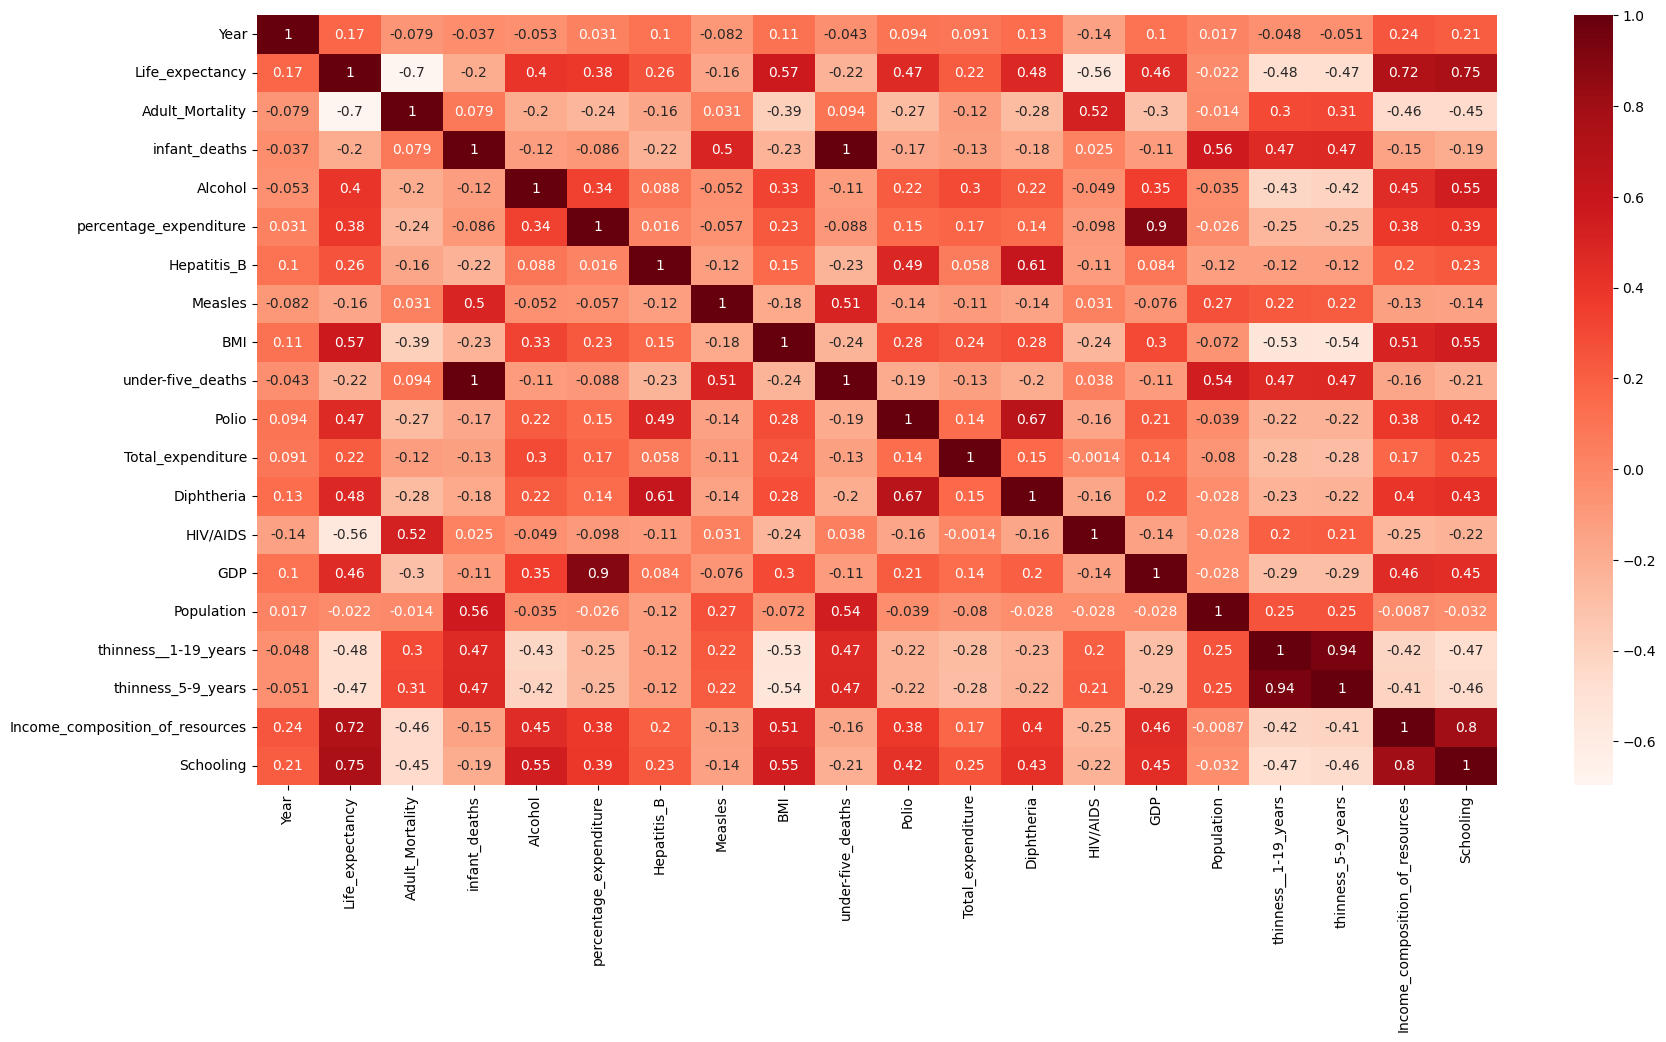

In [287]:
# Heatmap correlation
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True,cmap='Reds')

# **Training a Linear Regression Model**

# **X and y arrays**

In [320]:
X = df.drop('Adult_Mortality', axis=1).isnull()
y = df['under-five_deaths']

In [321]:
print("X=", X.shape,"\ny", y.shape)

X= (2938, 19) 
y (2938,)


# **Train Test Split**

In [322]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [323]:
X_train.shape

(2056, 19)

In [324]:
X_test.shape

(882, 19)

# **Linear Regression**

In [325]:
model = LinearRegression()

In [326]:
X_train.isnull().sum()

Year                               0
Life_expectancy                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
under-five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness__1-19_years               0
thinness_5-9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

In [330]:
y.dropna()

Country
Afghanistan    83
Afghanistan    86
Afghanistan    89
Afghanistan    93
Afghanistan    97
               ..
Zimbabwe       42
Zimbabwe       41
Zimbabwe       40
Zimbabwe       39
Zimbabwe       39
Name: under-five_deaths, Length: 2938, dtype: int64

In [331]:
model.fit(X_train, y_train)

LinearRegression()

# **Model Evaluation**

In [344]:
model.coef_

array([ 0.00000000e+00, -6.25502432e+01,  5.61280495e+13,  1.76368811e+01,
       -8.21042429e+12,  1.02659100e+01, -3.39603354e+12, -3.69738331e+14,
        1.26386951e+13, -4.99657741e+15, -3.16179175e+01,  4.99657741e+15,
       -2.00000000e+00,  8.34327964e+00, -3.90079297e+01,  9.23400931e+13,
        2.77398238e+14,  4.40317951e+01,  1.46901191e+01])

In [345]:
pd.DataFrame(model.coef_, X.columns, columns=['Coeficients'])

Coeficients
Year                             0.000000e+00
Life_expectancy                 -6.255024e+01
infant_deaths                    5.612805e+13
Alcohol                          1.763688e+01
percentage_expenditure          -8.210424e+12
Hepatitis_B                      1.026591e+01
Measles                         -3.396034e+12
BMI                             -3.697383e+14
under-five_deaths                1.263870e+13
Polio                           -4.996577e+15
Total_expenditure               -3.161792e+01
Diphtheria                       4.996577e+15
HIV/AIDS                        -2.000000e+00
GDP                              8.343280e+00
Population                      -3.900793e+01
thinness__1-19_years             9.234009e+13
thinness_5-9_years               2.773982e+14
Income_composition_of_resources  4.403180e+01
Schooling                        1.469012e+01

# **Predictions for our Model**

In [332]:
y_pred = model.predict(X_test)

# **Regression Evaluation Metrics**

Three common evaluation metrics for regression problems:
*   **Mean Absolute Error**(MAE) is hte mean of the absolute value of the errors:
*   **Mean Squared Error** (MSE) is the mean of the squared errors:
*   **Root Mean Squeared Error** (RMSE) is the square root of the mean of the squared errors:

All of these are **loss function**, because we want to minimize them.

In [333]:
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE= np.sqrt(MSE)

In [334]:
MAE

57.99053476545303

In [335]:
MSE

28949.556410898473

In [336]:
RMSE

170.14569172006227

In [337]:
df['Adult_Mortality'].mean()

164.79644808743168

In [338]:
test_residual= y_test - y_pred

In [340]:
pd.DataFrame({'Error Values': (test_residual)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

# **Residual Histogram**

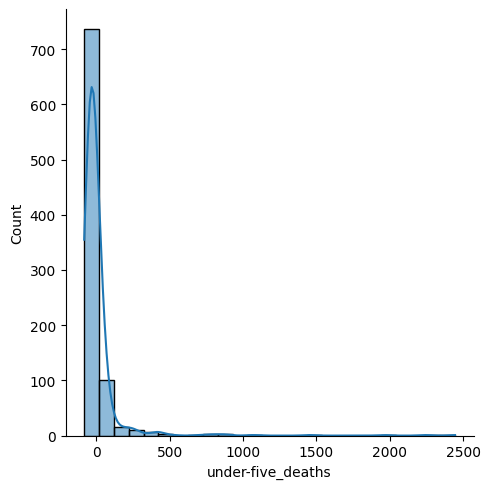

In [341]:
sns.displot(test_residual, bins=25, kde=True)

# **Residual plot shows residual error VS. true y value**

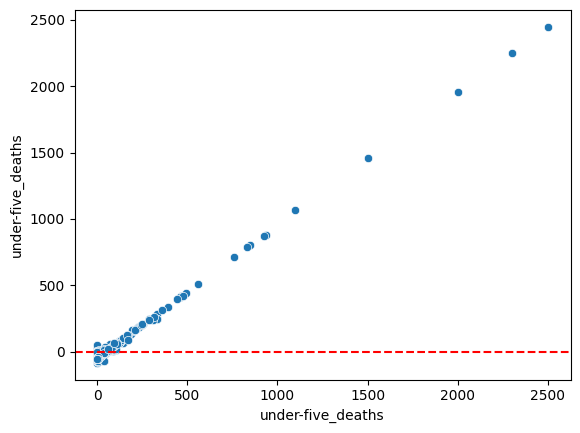

In [342]:
sns.scatterplot(x=y_test, y=test_residual)

plt.axhline(y=0, color='r', ls='--')